In [1]:
import pandas as pd
import matplotlib as mlp
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
gbd = pd.read_csv("../../../../Documentos/TB/GBD export/IHME-GBD_2016_DATA-42733deb-1.csv")

In [29]:
gbd.columns

Index(['measure', 'location', 'sex', 'age', 'cause', 'metric', 'year', 'val',
       'upper', 'lower'],
      dtype='object')

In [30]:
cases = gbd[(gbd["measure"]=="Incidence") & 
    (gbd.location == "Guatemala") & 
    (gbd.metric == "Number") & 
    (gbd.cause.isin(["All causes"]) == False)
   ].groupby(["year"]).val.sum()

In [31]:
pop = gbd[(gbd["measure"]=="Incidence") & 
    (gbd.location == "Guatemala") & 
    (gbd.metric.isin(["Rate", "Number"])) & 
    (gbd.cause.isin(["Tuberculosis"]))
   ].groupby(["year", "metric"]).val.sum().unstack(1).assign(N = lambda x: x.Number/x.Rate*100000)["N"]

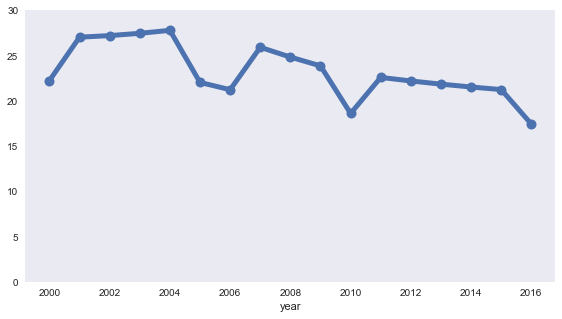

In [57]:
plt.rcParams["figure.figsize"] = (9.5,5)
plt.rcParams["lines.linewidth"] = 5
plt.rcParams["lines.markersize"] = 20
(100000 * cases / pop).plot(style=".-")
plt.ylim(0,30)
plt.grid(False)

In [58]:
cases

year
2000    2604.533497
2001    3243.989453
2002    3344.494824
2003    3457.077932
2004    3581.596189
2005    2905.743292
2006    2863.479522
2007    3573.939103
2008    3500.232660
2009    3435.421960
2010    2733.783261
2011    3386.951245
2012    3393.744716
2013    3404.159454
2014    3419.524265
2015    3440.225214
2016    2877.380430
Name: val, dtype: float64